In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyDOE2
import GPy
from GPy.kern import RBF
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_pdf
%matplotlib inline
from IPython.display import IFrame
from wand.image import Image as WImage
from sklearn.neighbors import KernelDensity
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import pandas as pd
from IPython.display import display, Markdown

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 15.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 25, # fontsize for x and y labels (was 10)
              'axes.titlesize': 25,
              'font.size': 15, # was 10
              'legend.fontsize': 25, # was 10
              'xtick.labelsize': 25,
              'ytick.labelsize': 25,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

### Learning Non-Stationary Space-Time Models for Environmental Monitoring (NOSTILL-GP)
### AAAI 2012
#### Sahil Garg, Amarjeet Singh and Fabio Ramos

#### Presenter: Zeel B Patel

### Introduction

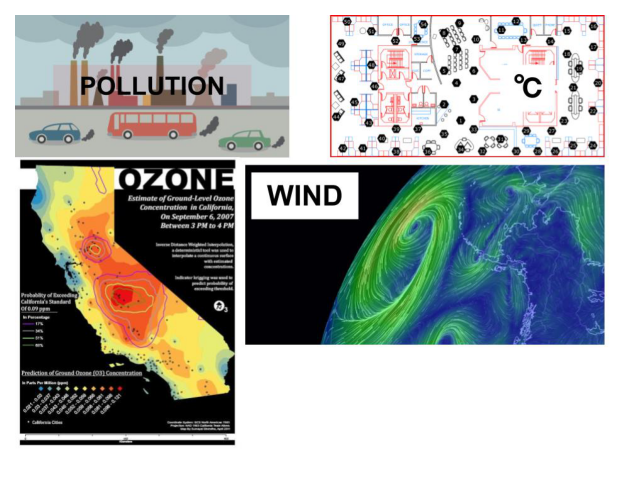

In [3]:
img = plt.imread('figures/Main picture.jpg')
plt.figure(dpi=150)
plt.imshow(img);
plt.axis('off');

### Notation

|Symbol|Identifier | Entity|
| :- | :- | :-: |
| $$A,B,C$$ | upper case (italic) | matrices |
| $$a, b, c$$ | lower case | scalars |
| $$\mathbf{a},\mathbf{b},\mathbf{c}$$ | lower case (bold) | vectors |

### Table of contents

1.  Gaussian processes (GP)
1.  NOSTILL-GP (<ins>**NO**</ins>n-stationary <ins>**S**</ins>pace-<ins>**TI**</ins>me <ins>**L**</ins>atent <ins>**L**</ins>engthscale <ins>**GP**</ins>)
1.  Efficient learning of NOSTILL-GP
1.  Experiments
1.  Results

### Non-linear regression Problem

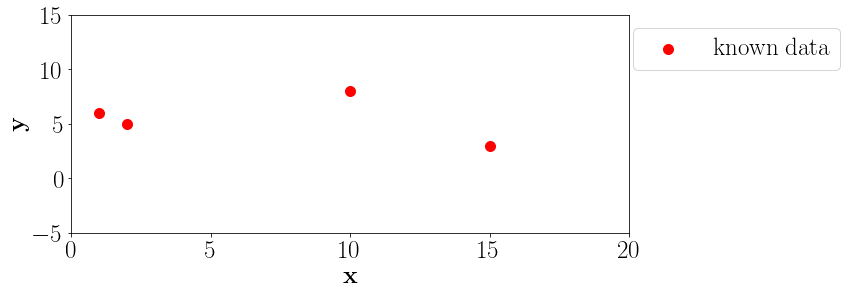

In [4]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
# ax.plot(x_, y_)
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.4,1]);

### Non-linear regression Problem

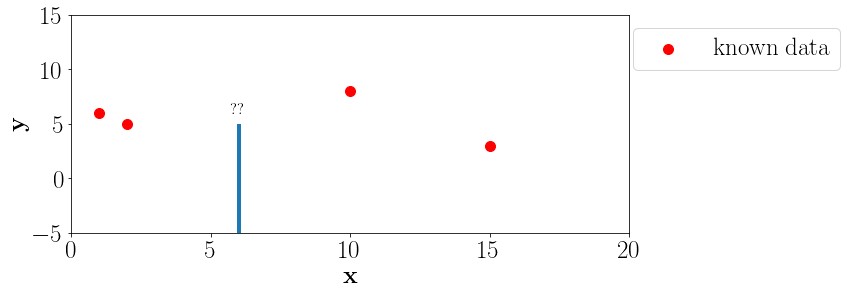

In [5]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
ax.vlines(6,-5,5,linewidth=4);
ax.text(5.7,6,'??')
# ax.plot(x_, y_)
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.4,1]);

### Non-linear regression Problem

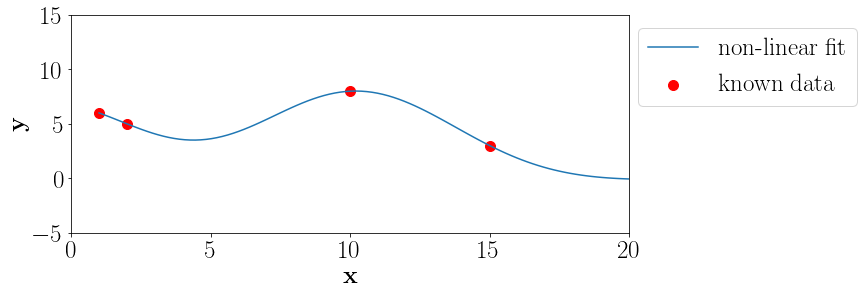

In [6]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
ax.plot(x_, y_,label='non-linear fit')
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.43,1]);

### Non-linear regression Problem

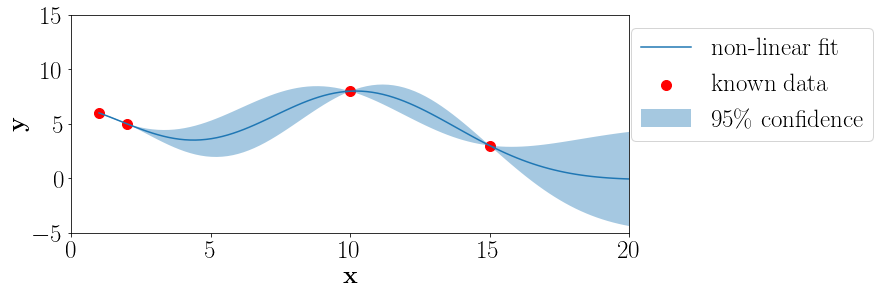

In [7]:
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='known data');
ax.plot(x_, y_,label='non-linear fit')
ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4, label='95\% confidence')
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{y}$');
ax.legend(bbox_to_anchor=[1.46,1]);

### Single observation - 1D Gaussian distribution
\begin{equation}
    y_1 \sim \mathcal{N}(0,\sigma_1^2)
\end{equation}

In [8]:
latexify(10,4)
fig, ax = plt.subplots()
x_d = np.linspace(-6, 6, 400)

def update(x):
    i, var = x
    ax.cla()
    one_dim_normal_data = np.random.normal(0, var, size=1000)
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(one_dim_normal_data[:, None])

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x_d[:, None])
    format_axes(ax)
    ax.fill_between(x_d, np.exp(logprob), alpha=0.4, color='gray')
    ax.scatter(one_dim_normal_data, np.full_like(one_dim_normal_data, -0.01), edgecolors='k',c='w')
    ax.set_title(f"$\sigma_1$ = {var}")
    ax.set_xlabel('$y_1$')
    ax.set_ylim(-0.05,0.5)
    ax.set_xlim(-8,8)
    ax.set_ylabel('$pdf(y_1)$')
    plt.tight_layout()

plt.close()
anim = FuncAnimation(fig, update, frames=[(i,var) for i, var in enumerate(np.linspace(0.5,2,10).round(2))])
rc('animation', html='jshtml')
anim

<Figure size 720x288 with 0 Axes>

### Bi-variate Gaussian distributions

\begin{equation}
\small
    \begin{bmatrix}
    y_1\\y_2
\end{bmatrix}
    \sim \mathcal{N}\left(
    \begin{bmatrix}
    0\\0
\end{bmatrix},
    \begin{bmatrix}
    \sigma_1^2 & \sigma_{12}\\
    \sigma_{21} & \sigma_{2}^2\\ 
\end{bmatrix}
    \right)
\end{equation}

In [9]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def make_pdf_2d_gaussian(mu, sigma, ax):
    ax.cla();ax2.cla()
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)



    # Create a surface plot and projected filled contour plot under it.
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.Greys)
    
    ax.set_xlabel(r"$y_1$")#,labelpad=-20)
    ax.set_ylabel(r"$y_2$")#,labelpad=-18)
    ax.set_zlabel("PDF")
    ax.tick_params(axis='both', which='major', pad=-1)

    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.Greys)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.25)
    ax.set_zticks(np.linspace(0,0.2,2))
    ax.view_init(27, -25)
    ticks = ['$y_1$','$y_2$']
    sns.heatmap(sigma, ax=ax2, cbar=False, annot=True, xticklabels=ticks, yticklabels=ticks)
    ax2.set_title('Covariance matrix')

latexify(10,5)
mu = np.array([0., 0.])
fig = plt.figure()
ax=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2)
# plt.subplots_adjust(wspace=1)
def update(x):
    i, s12 = x
    sigma = np.array([[ 1. , s12], [s12,  1]])
    make_pdf_2d_gaussian(mu, sigma, ax)
    
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=[(i,s12) for i, s12 in enumerate(np.linspace(0.9,-0.9,11).round(2))])
rc('animation', html='jshtml')
anim

In [10]:
latexify(10,5)
fig, ax = plt.subplots(1,2)

def update(corr):
    for axx in ax:
        axx.cla()
    np.random.seed(20)
    mu = np.zeros(2)
    sigma = np.array([[1,corr],[corr, 1]])
    L = np.linalg.cholesky(sigma)
    z = np.random.multivariate_normal(mu, np.eye(2)*0.6, size=10)
    zp = (L@z.T).T

    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 3, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)
    ticks = ['$y_1$','$y_2$']
    sns.heatmap(sigma, ax=ax[0], annot=True, cbar=False, xticklabels=ticks, yticklabels=ticks)
    ax[1].contour(X, Y, Z, cmap=cm.Greys);
    ax[1].scatter(zp[:,0], zp[:,1],c='r',s=40)
    ax[1].set_xlabel('$y_1$');ax[1].set_ylabel('$y_2$');

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=[0.7,0.4,0,0.4,0.7,0.9])
rc('animation', html='jshtml')
anim

### Bi-variate Gaussian distribution (another view-point)

In [11]:
sigma_2 = 0.1 
def plot_2d_contour_pdf_dimensions(random_num):
    sigma = np.array([[1,sigma_2],[sigma_2,1]])
    for axx in ax:
        axx.cla()
    X = np.linspace(-3, 3, 60)
    Y = np.linspace(-3, 3, 60)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, sigma)
    Z = F.pdf(pos)
    random_point = F.rvs(random_state=random_num)
    ticks = ['$y_1$','$y_2$']
    sns.heatmap(sigma, ax=ax[0], annot=True, cbar=False, xticklabels=ticks, yticklabels=ticks)
    ax[1].contour(X, Y, Z, cmap=cm.Greys)
    ax[1].scatter(random_point[0], random_point[1], color='k',s=100)
    ax[1].set_xlabel(r"$y_1$")
    ax[1].set_ylabel(r"$y_2$")
    
    data_array = pd.Series(random_point, index=['$x_1$','$x_2$'])
    data_array.plot(ax=ax[2], kind='line', marker='o',color='k')
    plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[2].set_ylim(-3, 3)
    ax[2].set_ylabel('$\mathbf{y}$')
    
    format_axes(ax[0])
    format_axes(ax[1])
    format_axes(ax[2])
    ax[0].set_title("Covariance Matrix")
    ax[1].set_title("Contour of pdf")
    ax[2].set_title("Visualising the point")
    plt.suptitle(f"Random state = {random_num}", y=1.1)
    plt.close()
#     plt.tight_layout()
#     import os
#     if not os.path.exists("images"):
#         os.makedirs("images")
#     if not os.path.exists(f"images/{sigma[0, 1]}"):
#         os.makedirs(f"images/{sigma[0, 1]}")
#     plt.savefig(f"images/{sigma[0, 1]}/{random_num}.pdf", bbox_inches="tight")
#     plt.close()

In [12]:
latexify(15,5)
fig, ax  = plt.subplots(ncols=3)

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_2d_contour_pdf_dimensions, frames=range(20))
rc('animation', html='jshtml')
anim

In [13]:
latexify(15,5)
fig, ax  = plt.subplots(ncols=3)

sigma_2=0.9
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_2d_contour_pdf_dimensions, frames=range(20))
rc('animation', html='jshtml')
anim

### Adhoc randomness to systematic randomness (Kernels)

* **Inuition**: Covariance between $y_1$ and $y_2$ depends on "how far $x_1$ is from $x_2$".

* A kernel or covariance function can be used to induce this behaviour

\begin{equation}
    Cov(y_1,y_2) = k(\mathbf{x}_1,\mathbf{x}_2) = \sigma_{12}
\end{equation}

### Squared exponential (RBF) kernel

\begin{equation}
    k(x_1,x_2) = e^{-\left(\frac{x_1-x_2}{l^2}\right)^2}
\end{equation}

In [14]:
latexify(10,3)
fig, ax = plt.subplots()
format_axes(ax)

x_1 = np.linspace(-5,5,100)
x_2 = 0

def rbf(l):
    tau = (x_1-x_2)/l
    return np.exp(-tau**2)

def update(l):
    ax.cla()
    ax.set_ylim(-0.1,1.1)
    kk = rbf(l)
    ax.plot(x_1, kk);
    ax.set_title(f'$l={l}$');
    ax.set_xlabel('$x$')
    ax.set_ylabel('$k(0,x)$')

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=range(1,6))
rc('animation', html='jshtml')
anim

### Effect of lengthscale on observations

In [15]:
def RBF(x1,x2,l):
    tau = (x1-x2)/l
    return np.exp(-tau**2)

def plot_vis(l):
    np.random.seed(0)
    for axx in ax:
        axx.cla()
    
    X = np.linspace(-5,5,5).reshape(-1,1).round(2)
    sigma = RBF(X,X.T,l)

    y = np.random.multivariate_normal(np.zeros(X.shape[0]), sigma, size=1)
    ticks = [f'$y_{i}$' for i in range(X.shape[0])]
    sns.heatmap(sigma, ax=ax[0], annot=True, cbar=False, xticklabels=ticks, yticklabels=ticks, fmt='.2f')
    
    for i in range(y.shape[0]):
        data_array = pd.Series(y[i,:], index=[j for j in X.ravel()])
        data_array.plot(ax=ax[1], kind='line', marker='o',color='k')
#     plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[1].set_xlabel('$\mathbf{x}$')
    ax[1].set_ylim(-3.5, 3.5)
    ax[1].set_ylabel('$\mathbf{y}$')
    
    format_axes(ax[0])
    format_axes(ax[1])
    ax[0].set_title(f"Covariance Matrix, $l={l}$, $N={X.shape[0]}$")
    ax[1].set_title("Visualising observations")
    plt.close()

In [16]:
latexify(12,4)
fig, ax = plt.subplots(1,2)

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_vis, frames=np.exp(np.linspace(0,5,15)).round(2))
rc('animation', html='jshtml')
anim

In [17]:
def RBF(x1,x2,l):
    tau = (x1-x2)/l
    return np.exp(-tau**2)

def plot_vis(l):
    np.random.seed(0)
    for axx in ax:
        axx.cla()
    
    X = np.linspace(-5,5,100).reshape(-1,1).round(2)
    sigma = RBF(X,X.T,l)

    y = np.random.multivariate_normal(np.zeros(X.shape[0]), sigma, size=5)
    sns.heatmap(sigma, ax=ax[0], annot=False, cbar=False, fmt='.2f')
    
    for i in range(y.shape[0]):
        data_array = pd.Series(y[i,:], index=[j for j in X.ravel()])
        data_array.plot(ax=ax[1], kind='line', marker='o')
#     plt.xticks(np.arange(len(data_array.index)), data_array.index.values)
    ax[1].set_xlabel('$\mathbf{x}$')
    ax[1].set_ylim(-3.5, 3.5)
    ax[1].set_ylabel('$\mathbf{y}$')
    
    format_axes(ax[0])
    format_axes(ax[1])
    ax[0].set_title(f"Covariance Matrix, $l={l}$, $N={X.shape[0]}$")
    ax[1].set_title("Visualising observations")
    plt.close()

In [18]:
latexify(12,4)
fig, ax = plt.subplots(1,2)

plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, plot_vis, frames=np.linspace(1,5,10).round(2))
rc('animation', html='jshtml')
anim

### Whole picture

* Observations togather follow a multi-variate distributions in space-time

* We can observe only finite number of them $\mathbf{y}$

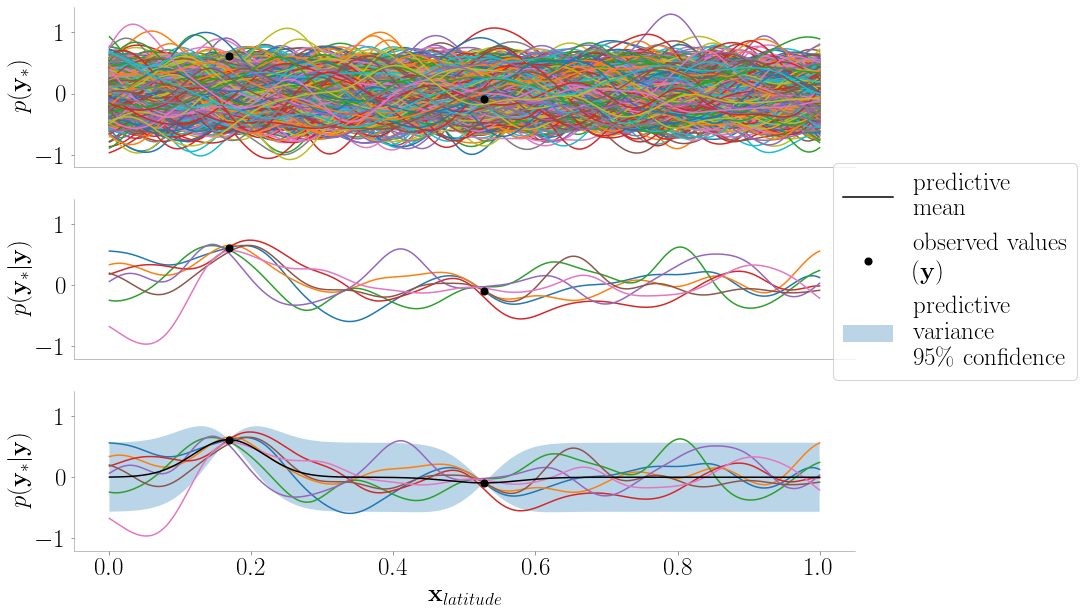

In [19]:
from GPy.kern import RBF
latexify(14,10)
N = 1000
FN = 1000
np.random.seed(2)
x = np.array(sorted(pyDOE2.doe_lhs.lhs(1, N))).reshape(-1,1)
xt_ind = np.random.choice(x.shape[0], 2) # Observed index
k = RBF(1, lengthscale=0.05, variance=0.08)
cov = k.K(x)
y = np.random.multivariate_normal(np.zeros(N), cov, size=FN)

fig, ax = plt.subplots(3,1, sharey=True)
for ind in range(FN):
    ax[0].plot(x, y[ind,:]);
ax[0].scatter(x[xt_ind], y[0,xt_ind],c='k',s=50,zorder=10,label='observed values\n($\mathbf{y}$)')
### Plotting posterior
# filtering functions that passes through observed values
y_ind = np.arange(y.shape[0])[np.all(np.abs(y[0,xt_ind]-y[:,xt_ind])<0.1, axis=1)]
ax[1].scatter(x[xt_ind], y[0,xt_ind],c='k',s=50,zorder=10)
for ind in y_ind:
    ax[1].plot(x, y[ind,:]);
ax[0].set_ylabel('$p(\mathbf{y_*})$');
# ax[1].set_xlabel('$\mathbf{x}_{latitude}$');
ax[1].set_ylabel('$p(\mathbf{y_*|y})$');
# ax[0].legend(bbox_to_anchor=(1,1));

ax2 = ax[2]
ax2.set_ylim(*ax[0].get_ylim())
post_mean = (cov[:,xt_ind]@np.linalg.inv(cov[np.ix_(xt_ind,xt_ind)])@y[0,xt_ind].reshape(-1,1)).squeeze()
post_cov = cov - cov[:,xt_ind]@np.linalg.inv(cov[np.ix_(xt_ind,xt_ind)])@cov[xt_ind,:]
post_std2 = np.sqrt(post_cov.diagonal())*2
for ind in y_ind:
    ax2.plot(x, y[ind,:]);
ax2.scatter(x[xt_ind], y[0,xt_ind],c='k',s=50,zorder=10,label='observed values\n($\mathbf{y}$)')
ax2.plot(x, post_mean,color='k',label='predictive\nmean');
ax2.fill_between(x.squeeze(),post_mean-post_std2, post_mean+post_std2, alpha=0.3, label='predictive\n variance\n 95\% confidence');
ax2.legend(bbox_to_anchor=[1.3,2.5]);
ax2.set_xlabel('$\mathbf{x}_{latitude}$');
ax2.set_ylabel('$p(\mathbf{y_*|y})$');
ax[0].set_xticks([]);ax[1].set_xticks([])

format_axes(ax2)

format_axes(ax[0])
format_axes(ax[1]);
# plt.tight_layout();

### Effect of lengthscale (horizontal-scale)

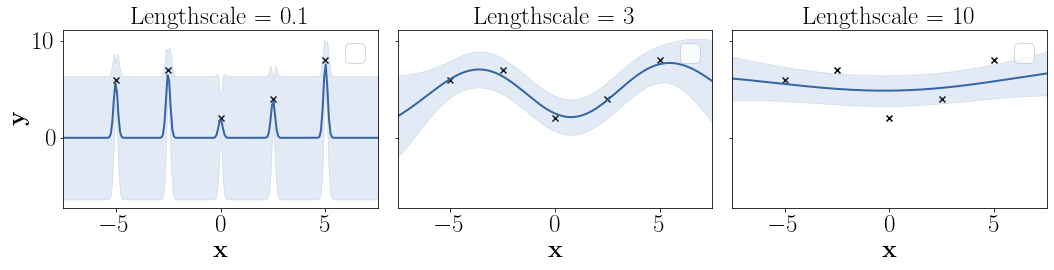

In [100]:
display(Markdown('### Effect of lengthscale (horizontal-scale)'))
latexify(15,4)
fig, ax = plt.subplots(1,3, sharey=True)
x = np.linspace(-5,5,5).reshape(-1,1)
y = np.array([6,7,2,4,8]).reshape(-1,1)
model = GPy.models.GPRegression(x, y, RBF(1))
model['Gaussian.noise'].fix(0.5)
for i, l in enumerate([0.1,3,10]):
    model.kern.variance = 10
    model.kern.lengthscale = l
    model.plot(ax=ax[i])
    ax[i].legend([])
    ax[i].set_title(f'Lengthscale = {l}')
    ax[i].set_xlabel('$\mathbf{x}$')
ax[0].set_ylabel('$\mathbf{y}$')
plt.tight_layout()

##### Can we find $p(\mathbf{y_*}|X_*,\mathbf{y},X)$ analytically? ($\mathbf{y}_*$- unknown, $\mathbf{y}$-known)
\begin{equation}
    p(\mathbf{y_*}|X_*,\mathbf{y},X) = \mathcal{N}(\boldsymbol{\mu}_*, \Sigma_*)   
\end{equation}

\begin{align}
K(\cdot,\cdot) &= \text{Kernel function}\\
    \mathbf{\mu}_* &= K(X_*,X)\cdot K^{-1}(X,X)\cdot \mathbf{y}\\
     \Sigma_* &= K(X_*,X_*)-K(X_*,X)\cdot K^{-1}(X,X)\cdot K(X,X_*)
\end{align}

### Table of contents
1.  Gaussian processes (GP)
1. **$\to$** NOSTILL-GP (<ins>**NO**</ins>n-stationary <ins>**S**</ins>pace-<ins>**TI**</ins>me <ins>**L**</ins>atent <ins>**L**</ins>engthscale <ins>**GP**</ins>)

##### Stationarity of kernels

Stationary kernels $\to$ $K^S(\mathbf{x},\mathbf{x'}) = f(\mathbf{x}-\mathbf{x'})$

Non-stationary kernels $\to$ $K^{NS}(\mathbf{x},\mathbf{x'}) \ne f(\mathbf{x}-\mathbf{x'})$

##### Kernels

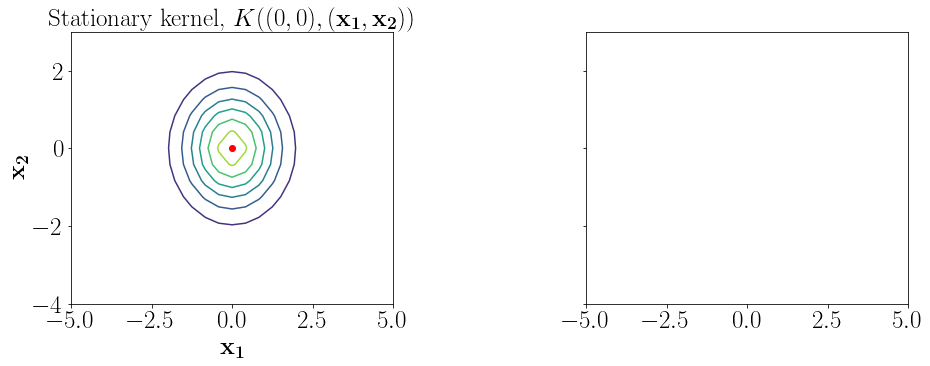

In [62]:
display(Markdown('##### Kernels'))
latexify(15,5)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.6)
np.random.seed(0)
N = 25
x = np.linspace(-5,5,N).reshape(-1,1)
l = np.random.multivariate_normal(np.zeros(N), RBF(1, variance=5, lengthscale=3).K(x,x))
X1, X2 = np.meshgrid(x,x)
L1, L2 = np.meshgrid(l,l)

from NSGPy.NumPy import LLS
model = LLS(2)

ZS = np.array([RBF(2).K(np.zeros((1,2)), np.array([i,j]).reshape(1,-1)) for i,j in zip(X1.ravel(), X2.ravel())])
ZNS = np.array([model.K(1, np.zeros((1,2)), 
                        np.ones((1,2)),
                         np.array([i,j]).reshape(1,-1), 
                         np.array([li,lj]).reshape(1,-1)) for i,j,li,lj in zip(X1.ravel(), X2.ravel(), L1.ravel(), L2.ravel())])
ZS = ZS.reshape(N,N)
ZNS = ZNS.reshape(N,N)
mapp = ax[0].contour(X1, X2, ZS, levels=7);
# plt.clabel(mapp);
mapp = ax[1].contour(X1, X2, ZNS, levels=7);
# plt.colorbar(mapp);
plt.clabel(mapp)
ax[0].set_title('Stationary kernel, $K((0,0), (\mathbf{x_1}, \mathbf{x_2}))$');
ax[1].set_title('Non-Stationary kernel, $K((0,0), (\mathbf{x_1}, \mathbf{x_2}))$');
for axx in ax:
    axx.scatter([0],[0],c='r')
    axx.set_xlabel('$\mathbf{x_1}$')
    axx.set_ylabel('$\mathbf{x_2}$')
    axx.set_ylim(-4,3)
ax[1].cla();
# Z.shape

##### Kernels

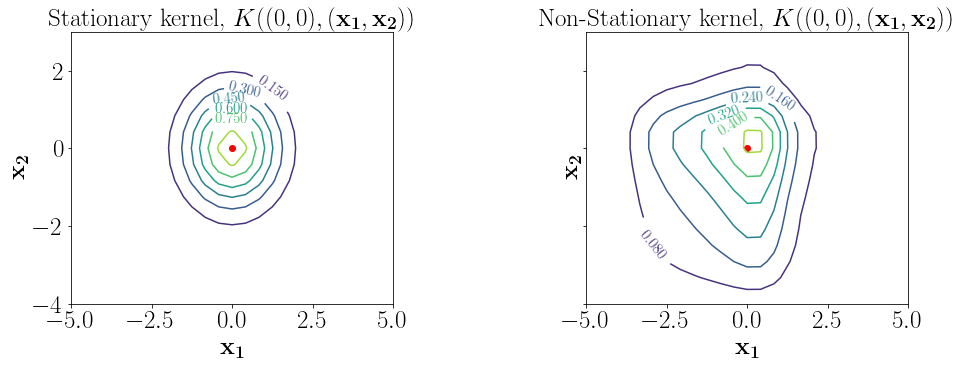

In [63]:
display(Markdown('##### Kernels'))
latexify(15,5)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.6)
np.random.seed(0)
N = 25
x = np.linspace(-5,5,N).reshape(-1,1)
l = np.random.multivariate_normal(np.zeros(N), RBF(1, variance=5, lengthscale=3).K(x,x))
X1, X2 = np.meshgrid(x,x)
L1, L2 = np.meshgrid(l,l)

from NSGPy.NumPy import LLS
model = LLS(2)

ZS = np.array([RBF(2).K(np.zeros((1,2)), np.array([i,j]).reshape(1,-1)) for i,j in zip(X1.ravel(), X2.ravel())])
ZNS = np.array([model.K(1, np.zeros((1,2)), 
                        np.ones((1,2)),
                         np.array([i,j]).reshape(1,-1), 
                         np.array([li,lj]).reshape(1,-1)) for i,j,li,lj in zip(X1.ravel(), X2.ravel(), L1.ravel(), L2.ravel())])
ZS = ZS.reshape(N,N)
ZNS = ZNS.reshape(N,N)
mapp = ax[0].contour(X1, X2, ZS, levels=7);
plt.clabel(mapp);
mapp = ax[1].contour(X1, X2, ZNS, levels=7);
# plt.colorbar(mapp);
plt.clabel(mapp)
ax[0].set_title('Stationary kernel, $K((0,0), (\mathbf{x_1}, \mathbf{x_2}))$');
ax[1].set_title('Non-Stationary kernel, $K((0,0), (\mathbf{x_1}, \mathbf{x_2}))$');
for axx in ax:
    axx.scatter([0],[0],c='r')
    axx.set_xlabel('$\mathbf{x_1}$')
    axx.set_ylabel('$\mathbf{x_2}$')
    axx.set_ylim(-4,3)
# ax[1].text(0,0.1,'Mountain',zorder=10, size=30, rotation=-50);
# ax[1].text(-2,-2,'River',zorder=10, size=30);
# Z.shape;

##### Kernels

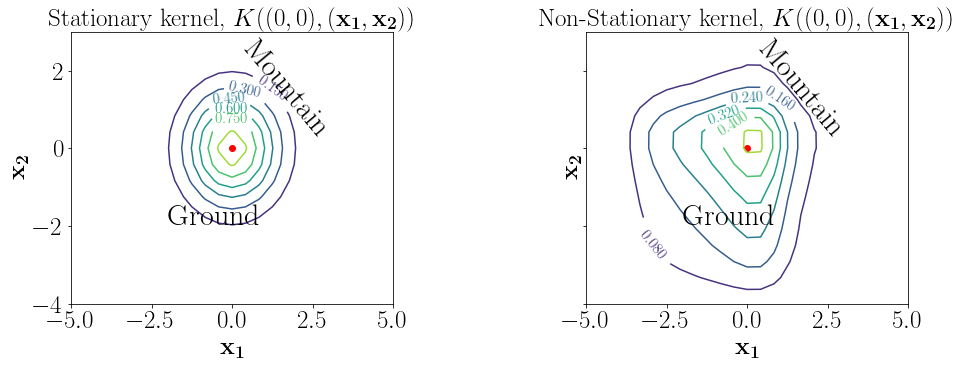

In [64]:
display(Markdown('##### Kernels'))
latexify(15,5)
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.6)
np.random.seed(0)
N = 25
x = np.linspace(-5,5,N).reshape(-1,1)
l = np.random.multivariate_normal(np.zeros(N), RBF(1, variance=5, lengthscale=3).K(x,x))
X1, X2 = np.meshgrid(x,x)
L1, L2 = np.meshgrid(l,l)

from NSGPy.NumPy import LLS
model = LLS(2)

ZS = np.array([RBF(2).K(np.zeros((1,2)), np.array([i,j]).reshape(1,-1)) for i,j in zip(X1.ravel(), X2.ravel())])
ZNS = np.array([model.K(1, np.zeros((1,2)), 
                        np.ones((1,2)),
                         np.array([i,j]).reshape(1,-1), 
                         np.array([li,lj]).reshape(1,-1)) for i,j,li,lj in zip(X1.ravel(), X2.ravel(), L1.ravel(), L2.ravel())])
ZS = ZS.reshape(N,N)
ZNS = ZNS.reshape(N,N)
mapp = ax[0].contour(X1, X2, ZS, levels=7);
plt.clabel(mapp);
mapp = ax[1].contour(X1, X2, ZNS, levels=7);
# plt.colorbar(mapp);
plt.clabel(mapp)
ax[0].set_title('Stationary kernel, $K((0,0), (\mathbf{x_1}, \mathbf{x_2}))$');
ax[1].set_title('Non-Stationary kernel, $K((0,0), (\mathbf{x_1}, \mathbf{x_2}))$');
for axx in ax:
    axx.scatter([0],[0],c='r')
    axx.set_xlabel('$\mathbf{x_1}$')
    axx.set_ylabel('$\mathbf{x_2}$')
    axx.set_ylim(-4,3)
    axx.text(0.2,0.3,'Mountain',zorder=10, size=30, rotation=-50);
    axx.text(-2,-2,'Ground',zorder=10, size=30);
# Z.shape;

#### Stationary Squared Exponential (SE) kernel

\begin{align}
       \tau &=\text{scaled distance}\\
       \tau &= \frac{(x_i-x_j)}{l} \\
        K^S_{SE}(\tau) &= \sigma_f^2\exp(-\tau^2) \tag{1}
\end{align}

##### Kernels

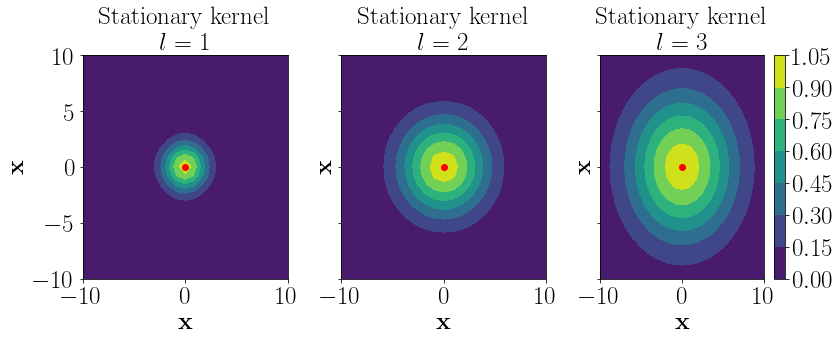

In [65]:
display(Markdown('##### Kernels'))
latexify(12,5)
fig, ax = plt.subplots(1,3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.3)
np.random.seed(0)
N = 25
x = np.linspace(-10,10,N).reshape(-1,1)
X1, X2 = np.meshgrid(x,x)

for l in [1,2,3]:
    ZS = np.array([RBF(2, lengthscale=l*1.5).K(np.zeros((1,2)), np.array([i,j]).reshape(1,-1)) for i,j in zip(X1.ravel(), X2.ravel())])
    ZS = ZS.reshape(N,N)
    mapp = ax[l-1].contourf(X1, X2, ZS, levels=7);
    ax[l-1].set_title(f'Stationary kernel\n$l={l}$');
    for axx in [ax[l-1]]:
        axx.scatter([0],[0],c='r')
        axx.set_xlabel('$\mathbf{x}$')
        axx.set_ylabel('$\mathbf{x}$')
        axx.set_ylim(-10,10)
        axx.set_xlim(-10,10)
plt.colorbar(mapp);
plt.tight_layout()

##### Kernels

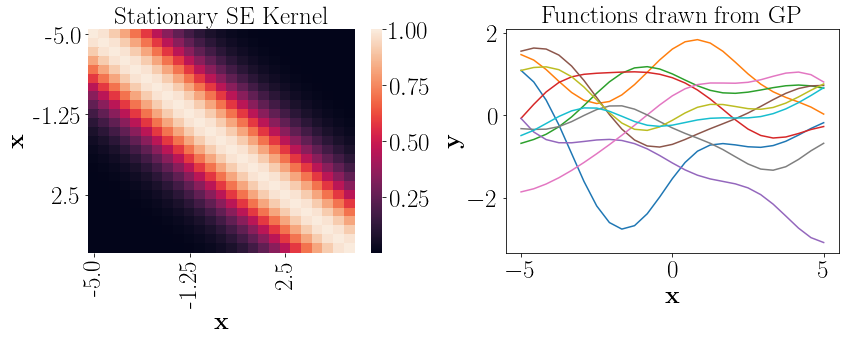

In [66]:
display(Markdown('##### Kernels'))
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1).round(2)
kernel = RBF(1, lengthscale=2, variance=1)

data = pd.DataFrame(kernel.K(x,x), index=x.squeeze(), columns=x.squeeze())
y = np.random.multivariate_normal(np.zeros(25), kernel.K(x,x), size=10)

fig, ax = plt.subplots(1,2)
latexify(10,5)
sns.heatmap(data, ax=ax[0]);
ax[0].locator_params(axis='y', nbins=3)
ax[0].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Stationary SE Kernel');
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
ax[1].set_xlabel('$\mathbf{x}$');ax[1].set_ylabel('$\mathbf{y}$')
ax[1].set_title('Functions drawn from GP')
plt.tight_layout()

##### Introducing latent lengthscales

* location depended lengthscales
* $l_i$ for each $x_i$

#### Non-stationary (latent lengthscales) SE kernel (Paciorek et al.)

\begin{equation}
        l_{ij} = \sqrt{\frac{l_i^2+l_j^2}{2}}\\
        \tau = \frac{(x_i-x_j)}{l_{ij}}\\
        K^{NS}_{SE}(\tau) = \sigma_f^2\exp(-\tau^2)\;\;\;\;\text{not valid yet}
\end{equation}

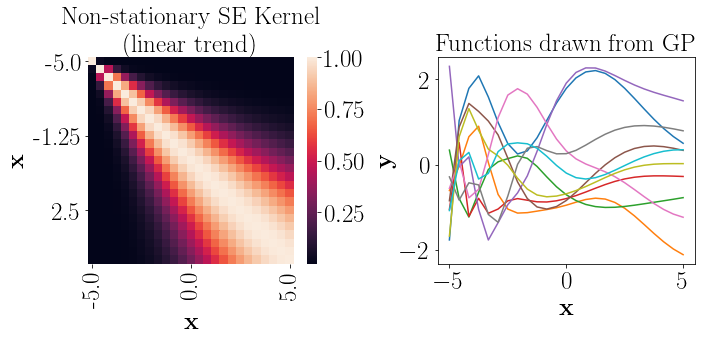

In [25]:
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.linspace(0.1,6,25).reshape(-1,1)

def NSRBF(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    return np.exp(-tau**2)

data = pd.DataFrame(NSRBF(x,x,l,l), index=x.squeeze(), columns=x.squeeze())
y = np.random.multivariate_normal(np.zeros(25), NSRBF(x,x,l,l), size=10)

fig, ax = plt.subplots(1,2)
latexify(10,5)
sns.heatmap(data, ax=ax[0]);
ax[0].locator_params(axis='y', nbins=3)
ax[0].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Non-stationary SE Kernel\n(linear trend)');
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
ax[1].set_xlabel('$\mathbf{x}$');ax[1].set_ylabel('$\mathbf{y}$')
ax[1].set_title('Functions drawn from GP')
plt.tight_layout()

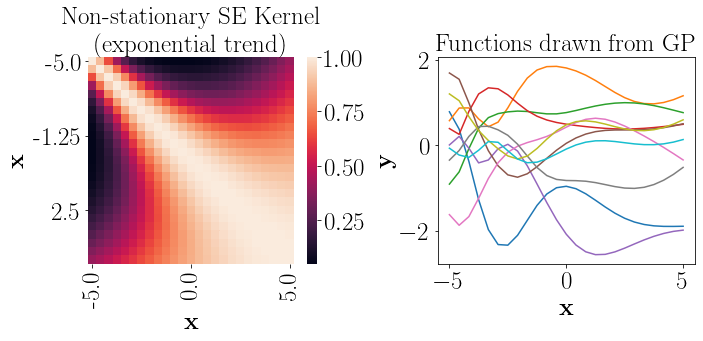

In [26]:
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.exp(np.linspace(0.1,3,25).reshape(-1,1))

def NSRBF(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    return np.exp(-tau**2)

data = pd.DataFrame(NSRBF(x,x,l,l), index=x.squeeze(), columns=x.squeeze())
y = np.random.multivariate_normal(np.zeros(25), NSRBF(x,x,l,l), size=10)

fig, ax = plt.subplots(1,2)
latexify(10,5)
sns.heatmap(data, ax=ax[0]);
ax[0].locator_params(axis='y', nbins=3)
ax[0].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Non-stationary SE Kernel\n (exponential trend)');
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
ax[1].set_xlabel('$\mathbf{x}$');ax[1].set_ylabel('$\mathbf{y}$')
ax[1].set_title('Functions drawn from GP')
plt.tight_layout()

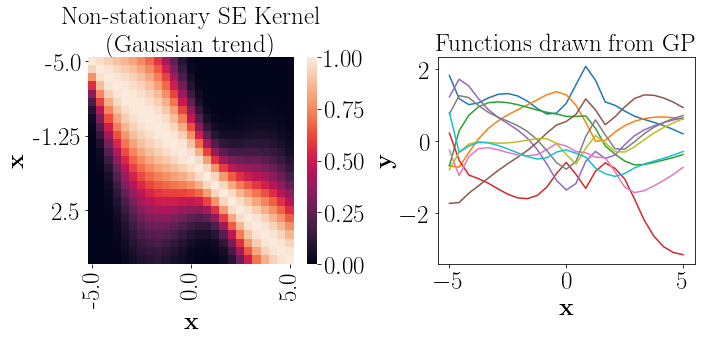

In [27]:
np.random.seed(0)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.random.multivariate_normal(np.zeros(25), RBF(1, variance=5, lengthscale=3).K(x,x))

def NSRBF(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    return np.exp(-tau**2)

data = pd.DataFrame(NSRBF(x,x,l,l), index=x.squeeze(), columns=x.squeeze())
y = np.random.multivariate_normal(np.zeros(25), NSRBF(x,x,l,l), size=10)

fig, ax = plt.subplots(1,2)
latexify(10,5)
sns.heatmap(data, ax=ax[0]);
ax[0].locator_params(axis='y', nbins=3)
ax[0].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('$\mathbf{x}$');ax[0].set_ylabel('$\mathbf{x}$');
ax[0].set_title('Non-stationary SE Kernel\n (Gaussian trend)');
for i in range(y.shape[0]):
    ax[1].plot(x, y[i,:])
ax[1].set_xlabel('$\mathbf{x}$');ax[1].set_ylabel('$\mathbf{y}$')
ax[1].set_title('Functions drawn from GP')
plt.tight_layout()

#### Local lengthscale (LLS) kernel in 1D (Paciorek et al., Plagemann et al.)

\begin{align}\label{LLS}
\Sigma_i &= l_i^2\\
        K^{NS}(x_i, x_j) &= \sigma_f^2|\Sigma_i|^{\frac{1}{4}}|\Sigma_j|^{\frac{1}{4}}\left|\frac{\Sigma_i+\Sigma_j}{2}\right|^{-\frac{1}{2}} K^S(\tau)\\
\end{align}

#### Seperable local lengthscale (LLS) kernel in 3D (Plagemann et al.)

\begin{align}\label{LLS}
\Sigma_i &= 
    \begin{bmatrix}
    ^{lat}l^2_i & 0 & 0\\
    0 & ^{long}l^2_i & 0\\
    0 & 0 & ^{t}l^2_i
    \end{bmatrix}\\
     \tau&=\tau_{lat}\cdot\tau_{long}\cdot\tau_{t}\\
        K^{NS}(\mathbf{x}_i, \mathbf{x}_j) &= \sigma_f^2|\Sigma_i|^{\frac{1}{4}}|\Sigma_j|^{\frac{1}{4}}\left|\frac{\Sigma_i+\Sigma_j}{2}\right|^{-\frac{1}{2}} K^S(\tau)\\
\end{align}

## Proposed model:
### Non-seperable NOSTILL-GP 

#### Theorem 1: Non-seperable NOSTILL kernel is valid



\begin{align}\label{LLS}
     \tau &= f(\tau^s, \tau^t)\\
        K^{NS}_{NOSTILL}(\mathbf{x}_i, \mathbf{x}_j) &= \sigma_f^2|\Sigma_i|^{\frac{1}{4}}|\Sigma_j|^{\frac{1}{4}}\left|\frac{\Sigma_i+\Sigma_j}{2}\right|^{-\frac{1}{2}} K^S(\tau)\\
\end{align}

#### $K^S(f(\tau^s, \tau^t))$
* Cressie et al.
\begin{align}
        K^S(f(\tau_s, \tau_t)) &=\frac{1}{(\tau_t^2+1)^{\frac{p-1}{2}}}\exp(-\frac{\tau_s^2}{\tau_t^2+1}) \tag{6}
\end{align}

#### $K^S(f(\tau^s, \tau^t))$
* Cressie et al.
\begin{align}
        K^S(f(\tau_s, \tau_t)) &= \frac{\tau_t^2+1}{[(\tau_t^2+1)^2+\tau_s^2]^{\frac{p}{2}}}\tag{7}
\end{align}

### Complexity of NOSTILL-GP

* $n$ observations, $3n$ parameters (lengthscales)
* $n$ number of gradient calculations and updates

## Proposed methods for efficient learning of NOSTILL-GP

1. Modeling lengthscales with another GP
    * Intelligent latent location selection
        1. Information gain
        1. Pseudo inputs
1. Sparse GPs

## Proposed methods for efficient learning of NOSTILL-GP

1. <ins>**Modeling lengthscales with another GP**</ins>
    * Intelligent latent location selection
        1. Information gain
        1. Pseudo inputs
1. Sparse GPs

##### Modeling lengthscales with another GP
### 4-GP Model (3-local, 1-global)

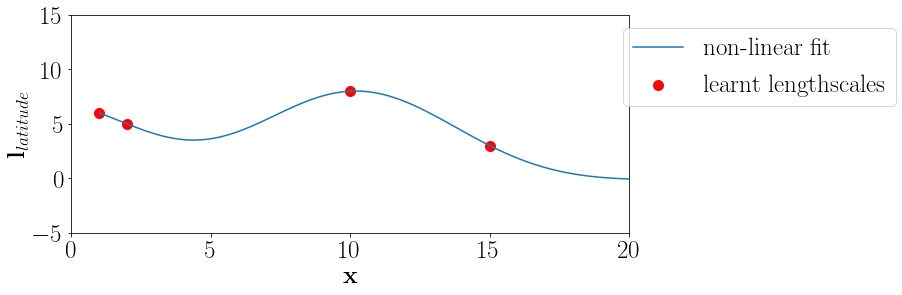

In [28]:
display(Markdown('##### Modeling lengthscales with another GP\n### 4-GP Model (3-local, 1-global)'))
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='learnt lengthscales');
ax.plot(x_, y_,label='non-linear fit')
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{l}_{latitude}$');
ax.legend(bbox_to_anchor=[1.5,1]);

##### Modeling lengthscales with another GP - 4-GP model
### 4-GP model time-complexity
* ($n'<<n$) parameters (lengthscales), $n$ observations
* 
* 

##### Modeling lengthscales with another GP - 4-GP model
### 4-GP model time-complexity
* ($n'<<n$) parameters (lengthscales), $n$ observations
* $n'$ number of gradient calculations and updates
* 

##### Modeling lengthscales with another GP - 4-GP model
### 4-GP model time-complexity
* ($n'<<n$) parameters (lengthscales), $n$ observations
* $n'$ number of gradient calculations and updates
* inference over $n$ points in $O(nn'^2)$ time

##### Modeling lengthscales with another GP - 4-GP model
### 4-GP model time-complexity
* ($n'<<n$) parameters (lengthscales), $n$ observations
* $n'$ number of gradient calculations and updates
* inference over $n$ points in $O(nn'^2)$ time

`Empirical time-complexity analysis missing in this work`

##### Modeling lengthscales with another GP
### 4-GP Model (3-local, 1-global)

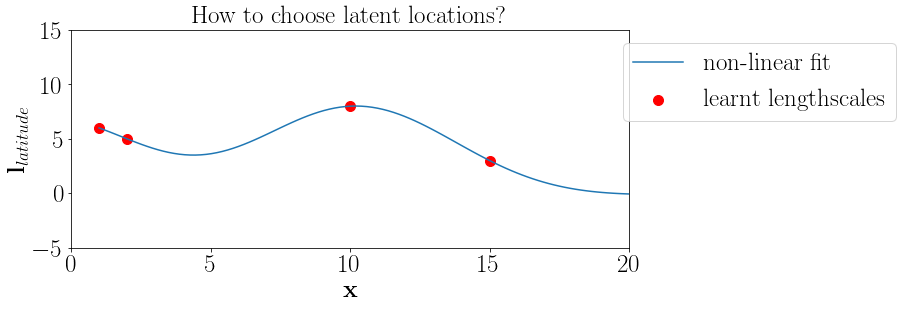

In [29]:
display(Markdown('##### Modeling lengthscales with another GP\n### 4-GP Model (3-local, 1-global)'))
latexify(10,4)

x = np.array([1,2,10,15]).reshape(-1,1)
x_ = np.linspace(1,20,100).reshape(-1,1)
y = np.array([6,5,8,3]).reshape(-1,1)
model = GPy.models.GPRegression(x,y,RBF(1, variance=0.01))
model['Gaussian.noise'].fix(0)
model.optimize()
model.kern.variance = 6
y_, var_ = model.predict(x_)
std2 = (np.sqrt(var_)*2).squeeze()
fig, ax = plt.subplots()
ax.scatter(x,y,s=100,c='r',label='learnt lengthscales');
ax.plot(x_, y_,label='non-linear fit')
# ax.fill_between(x_.squeeze(), y_.squeeze()-std2, y_.squeeze()+std2,alpha=0.4)
ax.set_xlim(0,20);ax.set_ylim(-5,15);
ax.set_xlabel('$\mathbf{x}$');ax.set_ylabel('$\mathbf{l}_{latitude}$');
ax.legend(bbox_to_anchor=[1.5,1]);
ax.set_title('How to choose latent locations?');

## Proposed methods for efficient learning of NOSTILL-GP

1. Modeling lengthscales with another GP
    * <ins>**Intelligent latent location selection**</ins>
        1. Information gain
        1. Pseudo inputs
1. Sparse GPs

## Proposed methods for efficient learning of NOSTILL-GP

1. Modeling lengthscales with another GP
    * Intelligent latent location selection
        1. <ins>**Information gain**</ins>
        1. Pseudo inputs
1. Sparse GPs

##### Intelligent latent location selection - 4-GP model
### Method 1: Maximizing Information gain (Krause et al.)

##### Intelligent latent location selection - 4-GP model
### Method 1: Maximizing Information gain (Krause et al.)
$\mathbf{l}-\text{known lengthscales}$, $\mathbf{l^*}-\text{unknown lengthscales}$

\begin{align}
    \text{Entropy} &\to argmax_l\;\mathcal{H}(l|\mathbf{l})\\
    \\
    \text{Mutual information} &\to argmax_l\;\mathcal{H}(l|\mathbf{l}) - \mathcal{H}(l|\mathbf{l^*})
\end{align}

In [30]:
display(Markdown('##### Intelligent latent location selection - 4-GP model - Information gain'))
# img2 = plt.imread('http://db.csail.mit.edu/labdata/lab.png')
# plt.figure(figsize=(12,5))
# plt.imshow(img2);
# plt.xlabel('$x_1$');plt.ylabel('$x_2$');
# plt.xticks([]);plt.yticks([]);
np.random.seed(0)
N = 100
x = np.linspace(-5,5,N).reshape(-1,1)
kernel = RBF(1).K(x,x)
y = np.abs(np.random.multivariate_normal(np.zeros(N), kernel))
cnd_m = [np.ones(N)]
cnd_cov = [kernel]
trn = []
tst = list(range(y.shape[0]))
tst_cpy = list(tst)
for selection in range(10):
    best_ind = None
    best_delta = -np.inf
    for y_ind in tst:
        
        if len(trn)==0:
            delta = kernel[y_ind, y_ind]
        else:
            delta = kernel[y_ind, y_ind] - kernel[y_ind, trn]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@kernel[trn, y_ind]
#         print(delta, best_delta)    
        if delta>best_delta:
            best_delta = delta
            best_ind = y_ind
    tst.remove(best_ind)
    trn.append(best_ind)
#     print(y_ind)
    cnd_m.append((kernel[np.ix_(tst_cpy,trn)]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@y[trn].reshape(-1,1))+1)
    cnd_cov.append(kernel - kernel[:,trn]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@kernel[trn,:])
    
latexify(10,5)
fig, ax = plt.subplots()


### plotting
def krause(frm):
    ax.cla()
    ax.plot()
    ax.scatter(x, y+1,c='k')
    ax.plot(x, cnd_m[frm], 'o-')
    ax.scatter(x[trn[:frm]], y[trn[:frm]]+1,c='r',zorder=10)
    std2 = np.sqrt(cnd_cov[frm].diagonal())*2
    ax.fill_between(x.squeeze(), cnd_m[frm].squeeze()-std2, cnd_m[frm].squeeze()+std2, alpha=0.4)
    ax.set_xlabel('$\mathbf{x}$', labelpad=-1)
    ax.set_ylabel('lengthscale (LS)')
    ax.set_ylim(-3,5)
    ax.set_title('Entropy, Learnt LS (Red), Predicted LS (Blue), GT LS (Black)')
    plt.tight_layout()

plt.close()
anim = FuncAnimation(fig, krause, frames=range(10))
rc('animation', html='jshtml')
anim

##### Intelligent latent location selection - 4-GP model - Information gain

<Figure size 720x360 with 0 Axes>

In [31]:
display(Markdown('##### Intelligent latent location selection - 4-GP model - Information gain'))

# img2 = plt.imread('http://db.csail.mit.edu/labdata/lab.png')
# plt.figure(figsize=(12,5))
# plt.imshow(img2);
# plt.xlabel('$x_1$');plt.ylabel('$x_2$');
# plt.xticks([]);plt.yticks([]);
np.random.seed(0)
N = 100
x = np.linspace(-5,5,N).reshape(-1,1)
kernel = RBF(1).K(x,x)
y = np.abs(np.random.multivariate_normal(np.zeros(N), kernel))
cnd_m = [np.ones(N)]
cnd_cov = [kernel]
trn = []
tst = list(range(y.shape[0]))
tst_cpy = list(tst)
for selection in range(10):
    best_ind = None
    best_delta = -np.inf
    for y_ind in tst:
        tst_tmp = list(tst)
        tst_tmp.remove(y_ind)
        if len(trn)==0:
            numer = kernel[y_ind, y_ind]
        else:
            numer = kernel[y_ind, y_ind] - kernel[y_ind, trn]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@kernel[trn, y_ind]
        denom = kernel[y_ind, y_ind] - kernel[y_ind, tst_tmp]@np.linalg.pinv(kernel[np.ix_(tst_tmp,tst_tmp)])@kernel[tst_tmp, y_ind]
#         print(delta, best_delta)    
        delta = numer/denom
        if delta>best_delta:
            best_delta = delta
            best_ind = y_ind
    tst.remove(best_ind)
    trn.append(best_ind)
#     print(y_ind)
    cnd_m.append((kernel[np.ix_(tst_cpy,trn)]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@y[trn].reshape(-1,1))+1)
    cnd_cov.append(kernel - kernel[:,trn]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@kernel[trn,:])
    
latexify(10,5)
fig, ax = plt.subplots()


### plotting
def krause(frm):
    ax.cla()
    ax.plot()
    ax.scatter(x, y+1,c='k')
    ax.plot(x, cnd_m[frm], 'o-')
    ax.scatter(x[trn[:frm]], y[trn[:frm]]+1,c='r',zorder=10)
    std2 = np.sqrt(cnd_cov[frm].diagonal())*2
    ax.fill_between(x.squeeze(), cnd_m[frm].squeeze()-std2, cnd_m[frm].squeeze()+std2, alpha=0.4)
    ax.set_xlabel('$\mathbf{x}$', labelpad=-1)
    ax.set_ylabel('lengthscale (LS)')
    ax.set_ylim(-3,5)
    ax.set_title('Mutual Info., Learnt LS (Red), Predicted LS (Blue), GT LS (Black)')
    plt.tight_layout()

plt.close()
anim = FuncAnimation(fig, krause, frames=range(10))
rc('animation', html='jshtml')
anim

##### Intelligent latent location selection - 4-GP model - Information gain

<Figure size 720x360 with 0 Axes>

##### Intelligent latent location selection - 4-GP model - Information gain

#### How do we get the covariance matrix?

1. Empirical covariance matrix
1. Stationary GP

##### Intelligent latent location selection - 4-GP model - Information gain

#### How do we get the covariance matrix?

1. <ins>**Empirical covariance matrix**</ins>
1. Stationary GP

##### Information gain algo - How do we get the covariance matrix?

#### Empirical covariance matrix

* Empirical covariance matrix $\Sigma_s$ (space)
| time | loc1 | loc2 | loc3|
| --- | --- | --- |---|
| 0 | O1 | O2 | O3|
| 1 | O4 | O5 | O6|
| 2 | O7 | O8 | O9|
* Get $X'_s$ (latent locations in space) with Information gain algo.

##### Information gain algo - How do we get the covariance matrix?

#### Empirical covariance matrix
* Empirical covariance matrix $\Sigma_t$ (time)
| loc | t1 | t2 | t3|
| --- | --- | --- |---|
| loc1 | O1 | O2 | O3|
| loc2 | O4 | O5 | O6|
| loc3 | O7 | O8 | O9|
* Get $\mathbf{x}'_t$ (latent locations in time) with Information gain algo.

##### Information gain algo - How do we get the covariance matrix?

#### Empirical covariance matrix
* Combine $X'_s$ (space) and $\mathbf{x}'_t$ (time) to get $X'$ (space-time)
* 

##### Information gain algo - How do we get the covariance matrix?

#### Empirical covariance matrix
* Combine $X'_s$ (space) and $\mathbf{x}'_t$ (time) to get $X'$ (space-time)
* e.g. 4 latent locations (space) $\times$ 3 latent locations (time) = 12 latent locations (space-time)

##### Intelligent latent location selection - 4-GP model - Information gain

#### How do we get the covariance matrix?

1. Empirical covariance matrix
1. <ins>**Stationary GP**</ins>

##### Information gain algo - How do we get the covariance matrix?

#### Stationary GP

1. Fit stationary GP to $X \to \mathbf{y}$ (computationally inexpensive)
1. 

##### Information gain algo - How do we get the covariance matrix?

#### Stationary GP

1. Fit stationary GP to $X \to \mathbf{y}$ (computationally inexpensive)
1. Compute covariance matrix by evaluating $K^S(X,X)$

## Proposed methods for efficient learning of NOSTILL-GP

1. Modeling lengthscales with another GP
    * Intelligent latent location selection
        1. Information gain
        1. <ins>**Pseudo inputs**</ins>
1. Sparse GPs

#### Intelligent latent locations by pseudo-inputs

* We want to learn pseudo output $y'$ at pseudo locations $X'$.
* 
* 

#### Intelligent latent locations by pseudo-inputs

* We want to learn pseudo output $y'$ at pseudo locations $X'$.
* Posterior likelihood $p(\mathbf{y}|X',\mathbf{y}',X)$ should be maximized.
* 

#### Intelligent latent locations by pseudo-inputs

* We want to learn pseudo output $y'$ at pseudo locations $X'$.
* Posterior likelihood $p(\mathbf{y}|X',\mathbf{y}',X)$ should be maximized.

In [32]:
display(Markdown('##### Intelligent latent location selection - 4-GP model - Pseudo inputs'))

# img2 = plt.imread('http://db.csail.mit.edu/labdata/lab.png')
# plt.figure(figsize=(12,5))
# plt.imshow(img2);
# plt.xlabel('$x_1$');plt.ylabel('$x_2$');
# plt.xticks([]);plt.yticks([]);
np.random.seed(1)
N = 100
ps = 4
x = np.linspace(-5,5,N).reshape(-1,1)
y = np.abs(np.random.multivariate_normal(np.zeros(N), kernel))
kernel = RBF(1).K(x,x)
cnd_m = [np.zeros(N)]
cnd_cov = [kernel]
trn = []
tst = list(range(y.shape[0]))
tst_cpy = list(tst)
for selection in range(10+ps):
    best_ind = None
    best_delta = -np.inf
    for y_ind in tst:
        tst_tmp = list(tst)
        tst_tmp.remove(y_ind)
        if len(trn)==0:
            numer = kernel[y_ind, y_ind]
        else:
            numer = kernel[y_ind, y_ind] - kernel[y_ind, trn]@np.linalg.pinv(kernel[np.ix_(trn,trn)])@kernel[trn, y_ind]
#         denom = kernel[y_ind, y_ind] - kernel[y_ind, tst_tmp]@np.linalg.pinv(kernel[np.ix_(tst_tmp,tst_tmp)])@kernel[tst_tmp, y_ind]
#         print(delta, best_delta)    
        delta = numer#/denom
        if delta>best_delta:
            best_delta = delta
            best_ind = y_ind
    tst.remove(best_ind)
    trn.append(best_ind)
#     print(y_ind)
    cnd_m.append((kernel[np.ix_(tst_cpy,trn[-ps:])]@np.linalg.pinv(kernel[np.ix_(trn[-ps:],trn[-ps:])])@y[trn[-ps:]].reshape(-1,1)))
    cnd_cov.append(kernel - kernel[:,trn[-ps:]]@np.linalg.pinv(kernel[np.ix_(trn[-ps:],trn[-ps:])])@kernel[trn[-ps:],:])
    
latexify(10,5)
fig, ax = plt.subplots()


### plotting

def log_likelihood(y,cov):
    cov = cov + np.eye(cov.shape[0])*10**-5
    return -0.5*y.T@np.linalg.pinv(cov)@y - 0.5*np.log(np.linalg.det(cov)) - 0.5*y.shape[0]*np.log(2*np.pi)

def krause(frm):
    ax.cla()
    ax.plot()
    ax.scatter(x, y,c='k')
    ax.plot(x, cnd_m[frm], 'o-')
    ax.scatter(x[trn[:frm][-ps:]], y[trn[:frm][-ps:]],c='r',zorder=10)
    std2 = np.sqrt(cnd_cov[frm].diagonal())*2
    ax.fill_between(x.squeeze(), cnd_m[frm].squeeze()-std2, cnd_m[frm].squeeze()+std2, alpha=0.4)
    ax.set_xlabel('$\mathbf{x}$', labelpad=-1)
    ax.set_ylabel('$\mathbf{y}$')
    ax.set_ylim(-ps,5)
    ### Likelihood
#     locs = trn[:frm][-ps:]
#     Lambda = np.eye(len(y))
#     M_inv = np.linalg.inv(kernel[np.ix_(locs, locs)])
#     for i in range(len(y)):
#         lmd = kernel[i, i] - kernel[i,locs]@M_inv@kernel[i,locs]
#         Lambda[i,i] = lmd
#     Mean = kernel[:,locs]@M_inv@y[trn[:frm][-ps:]]
#     nll = -log_likelihood(Mean, Lambda)
    ax.set_title('Pseduo locations (Red), Predicted $\mathbf{y}$ (Blue), Ground Truth $\mathbf{y}$ (Black)')
#     ax.legend([f'nll={nll.round(2)}'])
    plt.tight_layout()

plt.close()
anim = FuncAnimation(fig, krause, frames=range(ps,10+ps))
rc('animation', html='jshtml')
anim

##### Intelligent latent location selection - 4-GP model - Pseudo inputs

<Figure size 720x360 with 0 Axes>

## Proposed methods for efficient learning of NOSTILL-GP

1. Modeling lengthscales with another GP
    * Intelligent latent location selection
        1. Information gain
        1. Pseudo inputs
1. <ins>**Sparse GPs**</ins>

##### Efficient learning of GPs - Sparse GPs

### Sparse GPs

* Melkumyan et al. propose an exact sparse kernel

\begin{align}
        K^{Sparse}(\tau) = \begin{cases} \left[\frac{2+cos(2\pi\tau)}{3}(1-\tau)+\frac{1}{2\pi}sin(2\pi\tau)\right] & \tau<1\\
        0 & \tau \ge 1
        \end{cases}
\end{align}

##### Efficient learning of GPs - Sparse GPs

### Sparse GPs

\begin{align}
        K^{NS}(\tau) = K^{NOSTILL}(\tau) \times K^{Sparse}(\tau) 
\end{align}

##### Efficient learning of GPs - Sparse GPs

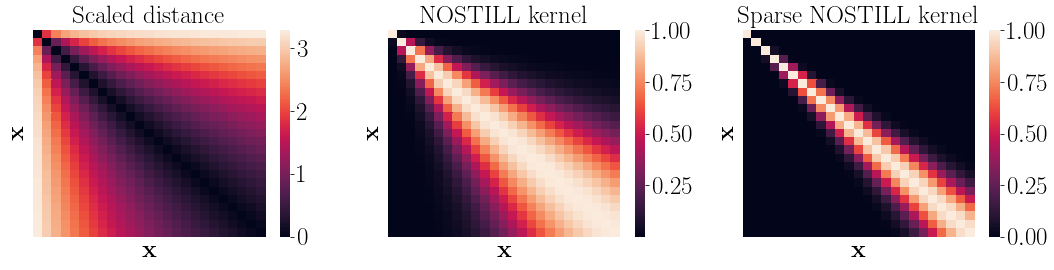

In [33]:
display(Markdown('##### Efficient learning of GPs - Sparse GPs'))
latexify(15,4)

def sparse(x1,x2,l1,l2):
    l_ij = (l1 + l2.T)/2
    x_ij = np.abs(x1 - x2.T)
    tau = x_ij/l_ij
    tau_bool = tau < 1
    kernel = (2+np.cos(2*np.pi*tau))*(1/3)*(1-tau) + (1/2/np.pi)*np.sin(2*np.pi*tau)
    return kernel * tau_bool

fig, ax = plt.subplots(1,3)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.linspace(0.1,6,25).reshape(-1,1)
l_ij = (l + l.T)/2
x_ij = np.abs(x - x.T)
tau = x_ij/l_ij
kernel = NSRBF(x,x,l,l)
Skernel = sparse(x,x,l,l)
sns.heatmap(tau, ax=ax[0],xticklabels=[], yticklabels=[]);ax[0].set_title('Scaled distance')
sns.heatmap(kernel, ax=ax[1],xticklabels=[], yticklabels=[]);ax[1].set_title('NOSTILL kernel')
sns.heatmap(Skernel*kernel, ax=ax[2],xticklabels=[], yticklabels=[]);ax[2].set_title('Sparse NOSTILL kernel')
for axx in ax:
    axx.set_xlabel('$\mathbf{x}$')
    axx.set_ylabel('$\mathbf{x}$')
ax[0].set_xlabel('$\mathbf{x}$')
ax[0].set_ylabel('$\mathbf{x}$')
plt.tight_layout()

##### Efficient learning of GPs - Sparse GPs

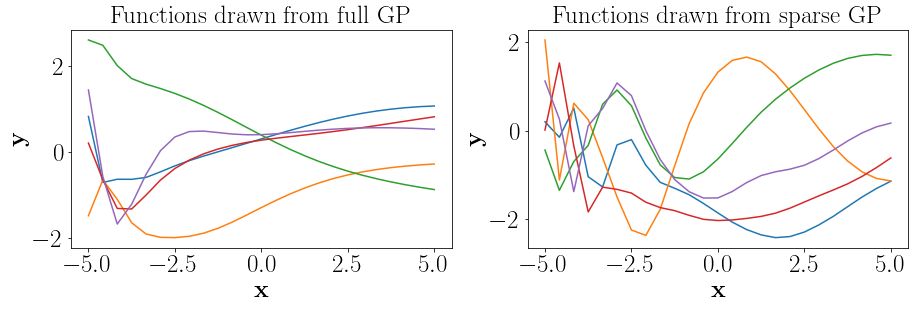

In [34]:
display(Markdown('##### Efficient learning of GPs - Sparse GPs'))
latexify(15,4)

fig, ax = plt.subplots(1,2)
x = np.linspace(-5,5,25).reshape(-1,1)
l = np.linspace(0.1,6,25).reshape(-1,1)*2
l_ij = (l + l.T)/2
x_ij = np.abs(x - x.T)
tau = x_ij/l_ij
kernel = NSRBF(x,x,l,l)
Skernel = sparse(x,x,l,l)
y = np.random.multivariate_normal(np.zeros(25), kernel, size=5)
Sy = np.random.multivariate_normal(np.zeros(25), Skernel*kernel, size=5)
for i in range(y.shape[0]):
    ax[0].plot(x, y[i,:])
    ax[1].plot(x, Sy[i,:])
for axx in ax:
    axx.set_ylabel('$\mathbf{y}$')
    axx.set_xlabel('$\mathbf{x}$')
ax[0].set_title('Functions drawn from full GP')
ax[1].set_title('Functions drawn from sparse GP');

### Experiments

| Data           | Stations | Train stations | Timeline   | Granularity |
|----------------|----------|----------------|------------|-------------|
| USA Ozone      | 60       | 30             | 1995-2011  | 1 year      |
| Ireland Wind   | 12       | 12             | 1961-1978  | 1 day       |
| Berkeley Temp. | 46       | 23             | March-2004 | 22 min      |

#### Baselines
| Method | Abr. |
| --- | --- |
|Stationary GP|S
|NS-Chunsheng|NS-C
|Mixures of GPs|NS-MGP
|Latent extention|NS-LEIS

### Key insights - USA Ozone dataset
| Model | Latent location selection | RMSE |
| :-- | :-- | --: |
|NOSTILL| Information gain - Entropy | 2.82|
|NOSTILL| Information gain - Mutual info. | 2.85|
|NOSTILL| Pseudo inputs | 3.08|
|NS-latent extension | -- | 4.01|
|NS-Mixture of GPs | -- | 4.01|
|NS-Chunsheng | -- | 7.27|
|Stationary GP | -- | 7.39|

### Key insights - Ireland Wind dataset
| Model | Latent location selection | RMSE |
| :-- | :-- | --: |
|NOSTILL| Information gain - Entropy | 2.34|
|NOSTILL| Pseudo inputs | 2.72|
|NOSTILL| Information gain - Mutual info. | 2.73|
|Stationary GP | -- | 3.74|
|NS-Chunsheng | -- | 3.76|
|NS-Mixture of GPs | -- | 4.34|
|NS-latent extension | -- | 4.46|

### Key insights - Berkeley Intel Laboratory Temperature Data
| Model | Latent location selection | RMSE |
| :-- | :-- | --: |
|NOSTILL| Information gain - Entropy | 1.36|
|NOSTILL| Pseudo inputs | 1.37|
|NOSTILL| Information gain - Mutual info. | 1.41|
|Stationary GP | -- | 1.53|
|NS-latent extension | -- | 1.75|
|NS-Chunsheng | -- | 2.42|
|NS-Mixture of GPs | -- | 10.46|

### Thank you